## Use OpenAI Whisper to transcribe speech to text with time stamp


In [1]:
import whisper
import os
import sys
import datetime

def format_timestamp(seconds: float):
    return str(datetime.timedelta(seconds=int(seconds)))

def transcribe_audio(file_path, model_size="medium"):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File '{file_path}' does not exist.")

    print(f"Loading Whisper model '{model_size}'...")
    model = whisper.load_model(model_size)

    print(f"Transcribing file: {file_path}")
    result = model.transcribe(file_path, verbose=False)

    print("\n--- Transcription with Timestamps ---\n")
    for segment in result["segments"]:
        start = format_timestamp(segment["start"])
        end = format_timestamp(segment["end"])
        text = segment["text"].strip()
        print(f"[{start} --> {end}] {text}")

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: python Transcribe.py path/to/audio_or_video")
        sys.exit(1)

    input_path = 'data\HuongDanLamThitKho.mp4'
    try:
        transcribe_audio(input_path, model_size="medium")
    except Exception as e:
        print(f"Error: {e}")


Loading Whisper model 'medium'...
Transcribing file: data\HuongDanLamThitKho.mp4


c:\Intern-Repo\Huy\JupyterNoteBook\.venv\Lib\site-packages\whisper\transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Detected language: Vietnamese


100%|██████████| 7104/7104 [01:43<00:00, 68.48frames/s]


--- Transcription with Timestamps ---

[0:00:00 --> 0:00:14] Để làm món thịt kho trứng ngon, bạn cần chuẩn bị khoảng 500 g thịt ba chỉ, bún, 6 quả trứng gà hoặc trứng vịt, nước dừa tươi và các gia vị như nước mắm, đường, hành tỏi, tiêu, muối, ớt
[0:00:14 --> 0:00:24] Đầu tiên, bạn rửa sạch thịt ba chỉ, cắt miếng vùng vừa ăn, ướp với nước mắm, đường, tỏi băm, tiêu và một ít muối trong 20-30 phút
[0:00:24 --> 0:00:29] Trong lúc chờ, luộc trứng, bóc vỏ và có thể chiên sơ cho trứng sang lại
[0:00:29 --> 0:00:37] Sau đó, bạn thắng nước màu bằng cách đun đường với chút dầu cho đến khi có màu nâu cánh dáng, rồi cho thịt vào đảo đều cho sang lại
[0:00:37 --> 0:00:45] Tiếp theo, cho nước dừa vào ngập mặt thịt và đun sôi, hớt bọt nếu có, rồi hạ nhỏ lửa kho lưu riêu khoảng 30-40 phút
[0:00:45 --> 0:00:52] Cuối cùng, cho trứng đã luộc vào nồi, tiếp tục kho thêm 20 phút cho trứng thấm vị, nêm nếm lại cho vừa ăn
[0:00:52 --> 0:00:57] Món này ngon nhất khi ăn kèm cơm trắng, dưa chua hoặc rau luộc
[0

## Data Preparation and Training YoloV8 evaluation

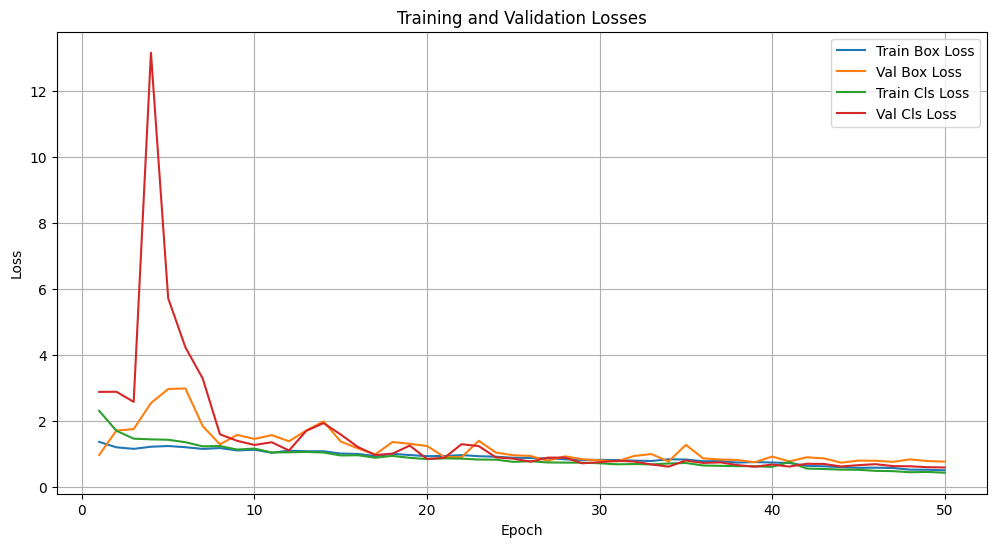

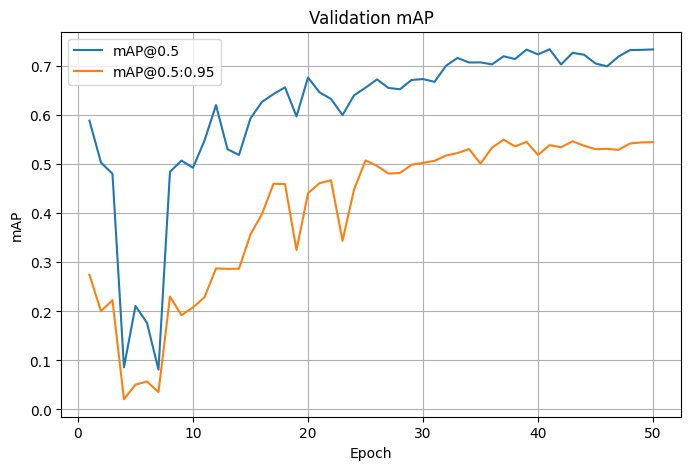

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("C:/Users/hvuongbaovo/Downloads/results (1).csv")

# Plot losses
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

# Plot mAP
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Validation mAP')
plt.legend()
plt.grid(True)
plt.show()


## Relablel the class for data

In [3]:
import os

label_folder = r"C:\YoloV8TrainingDataSet\Ambulance_Car\train\labels"

for filename in os.listdir(label_folder):
    if not filename.endswith(".txt"):
        continue
    path = os.path.join(label_folder, filename)
    with open(path, 'r') as f:
        lines = f.readlines()

    new_lines = []
    for line in lines:
        parts = line.strip().split()
        if parts and parts[0] == 'Car':
            parts[0] = '3'  # Change class from 0 → 1
        new_lines.append(' '.join(parts) + '\n')

    with open(path, 'w') as f:
        f.writelines(new_lines)

print("Relabeling complete.")


Relabeling complete.


## AWS API Gateway with AWS Lambda Function that retrieve all the records from a table

In [ ]:
import pymysql
import json

endpoint = 'huy.cfsyaaw461l4.ap-southeast-2.rds.amazonaws.com'
username = 'admin'
password = 'Thtruemilk123'
database_name = 'customer'

connection = pymysql.connect(host = endpoint, user = username, password = password, database = database_name) 

def lambda_handler():
    try:
        cursor = connection.cursor()
        cursor.execute("Select * FROM customer_info")

        rows = cursor.fetchall()
        for row in rows:
            print(row)

        columns = [desc[0] for desc in cursor.description]
        results = [dict(zip(columns, row)) for row in rows]

        # Format the JSON response with indentation
        formatted_body = json.dumps(results, indent=4)

        return {
            "statusCode": 200,
            "headers": {"Content-Type": "application/json"},
            "body": formatted_body
        }
    
    except Exception as e:
        # Log the full error
        print(f"Error: {e}")
        return {
            "statusCode": 500,
            "body": json.dumps({"error": str(e)})
        }
    
           
lambda_handler()		

(1, 'Vo Vuong Bao Huy', '111 ABC street, Ho Chi Minh City')
(2, 'Hoang', '123 Street, Ho Chi Minh City')
(3, 'Khoa', '124 Street, Ho Chi Minh City')


{'statusCode': 200,
 'headers': {'Content-Type': 'application/json'},
 'body': '[\n    {\n        "id": 1,\n        "customer_name": "Vo Vuong Bao Huy",\n        "address": "111 ABC street, Ho Chi Minh City"\n    },\n    {\n        "id": 2,\n        "customer_name": "Hoang",\n        "address": "123 Street, Ho Chi Minh City"\n    },\n    {\n        "id": 3,\n        "customer_name": "Khoa",\n        "address": "124 Street, Ho Chi Minh City"\n    }\n]'}

## Python code connect to AWS MySQL RDS in order to insert a new record to a table

In [ ]:
import pymysql
from datetime import datetime

# RDS Configuration
endpoint = 'huy.cfsyaaw461l4.ap-southeast-2.rds.amazonaws.com'
username = 'admin'
password = 'Thtruemilk123'
database_name = 'customer'


# Connect to RDS MySQL
connection = pymysql.connect(
    host=endpoint,
    user=username,
    password=password,
    database=database_name
)

def insert_transaction(id, customer_name, address):
    cursor = connection.cursor()
        
    sql = """
    INSERT INTO customer_info
    VALUES (%s, %s, %s)"""
    values = (id, customer_name, address)
        
    cursor.execute(sql, values)
    connection.commit()
    print("Inserted successfully!")

    cursor.close()
    connection.close()
    print("Connection closed.")    

# Example usage
insert_transaction(3, "Khoa", "124 Street, Ho Chi Minh City")


Inserted successfully!
Connection closed.


## AWS API Gateway with AWS Lambda Function insert a new record to AWS MySQL RDS through Postman

In [6]:
import pymysql
import json


endpoint = 'huy.cfsyaaw461l4.ap-southeast-2.rds.amazonaws.com'
username = 'admin'
password = 'Thtruemilk123'
database_name = 'customer'

connection = pymysql.connect(
            host=endpoint,
            user=username,
            password=password,
            database=database_name
        )

def lambda_handler(event, context):
    connection = None
    try:
        body = json.loads(event['body'])
        id = body.get('id')
        customer_name = body.get('customer_name')
        address = body.get('address')

        if not (id and customer_name and address):
            return {
                "statusCode": 400,
                "body": json.dumps({"error": "Missing id, customer_name, or address"})
            }

        cursor = connection.cursor()
        sql = "INSERT INTO customer_info (id, customer_name, address) VALUES (%s, %s, %s)"
        values = (id, customer_name, address)

        cursor.execute(sql, values)
        connection.commit()

        return {
            "statusCode": 200,
            "body": json.dumps({"message": "Inserted successfully!"})
        }

    except Exception as e:
        print(f"Error: {e}")
        return {
            "statusCode": 500,
            "body": json.dumps({"error": str(e)})
        }

    finally:
        if connection:
            connection.close()
